# Introduction To Neural Network Classification Using TensorFlow

Types of Classification :-
- Binary Classification
- Multi-Class Classification
- Multi-Label Classification

## Creating Data To View and Fit the Model

In [6]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=38)

In [2]:
X[:10]

array([[-0.10238924,  0.73469419],
       [-0.90294102,  0.43066422],
       [ 0.9673709 ,  0.1034921 ],
       [ 0.46361003,  0.87768086],
       [ 0.55258119, -0.85737417],
       [-0.62125488, -0.74990112],
       [-0.75152876, -0.14894434],
       [ 0.69147032, -0.38863828],
       [-0.4832384 , -0.64813623],
       [ 0.30820866, -0.76472142]])

In [3]:
y[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

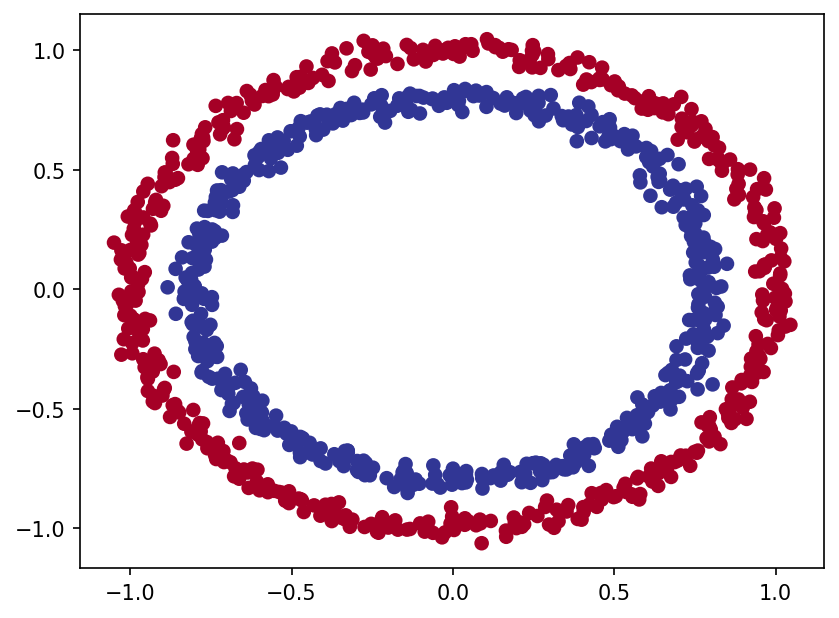

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

## Creating a test model

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
import tensorflow as tf

In [8]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model_1.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 2.2541 - accuracy: 0.5063
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.8541 - accuracy: 0.5063
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7821 - accuracy: 0.5063
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7441 - accuracy: 0.5063
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7215 - accuracy: 0.5063
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7073 - accuracy: 0.5063
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5063
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5063
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5050
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4625
Epoch 11/

In [9]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5800


[0.6941967606544495, 0.5799999833106995]

## Improving Our Model

To improve our model, we will make a new function - `plot_decision_boundary()` which will:
1. Take trained model, features *X* and labels *y*
2. Create a `meshgrid` of different *X* values
3. Make predictions across the `meshgrid`
4. Plot predictions as well as a line between zones (where each unique class falls)

In [8]:
import numpy as np

In [9]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_preds = model.predict(x_in)

    print("Doing binary classification")
    y_preds = np.round(y_preds).reshape(xx.shape)

    # Plotting the decision boundary
    plt.contourf(xx, yy, y_preds, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
Doing binary classification


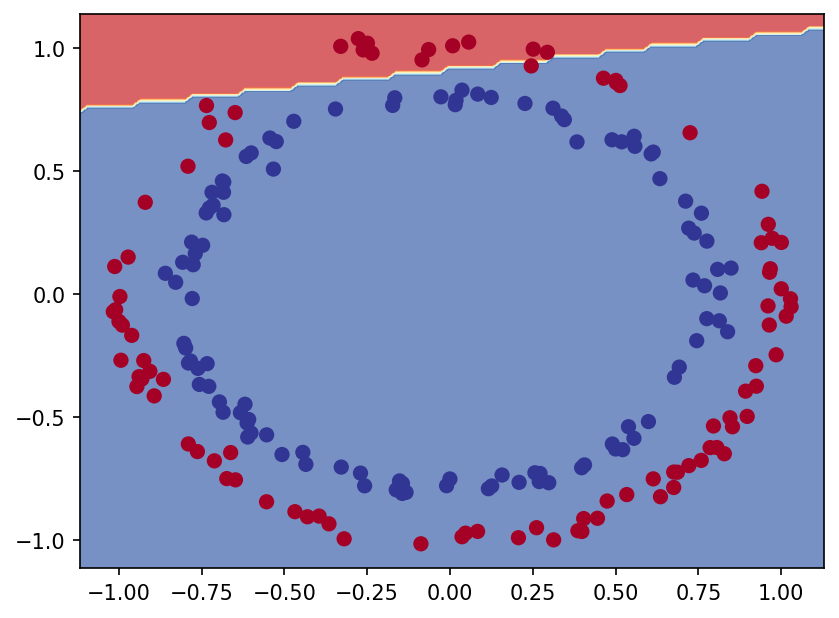

In [13]:
# Check out the predictions our model is making
plot_decision_boundary(model_1, X_test, y_test)

In [14]:
tf.__version__

'2.10.0'

313/313 [==============================] - 1s 2ms/step
Doing binary classification


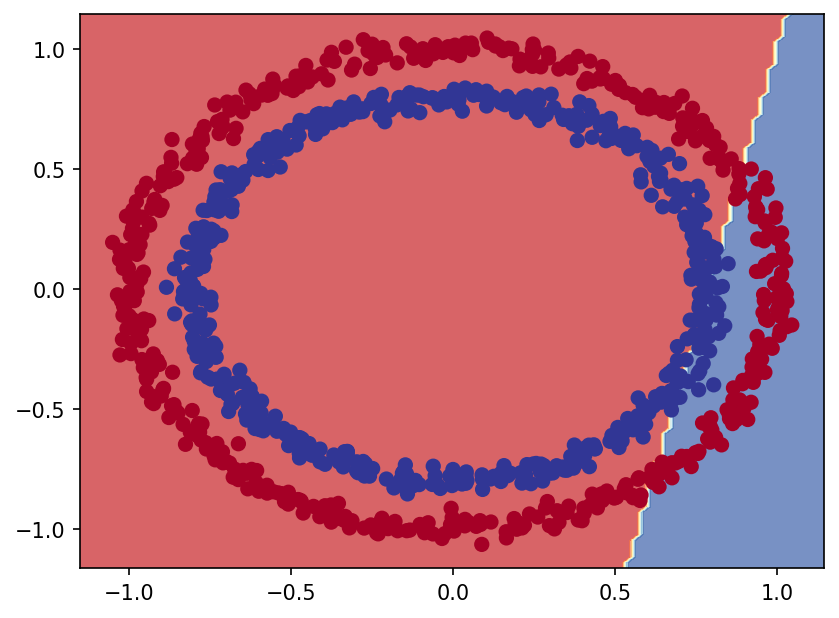

In [17]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model_2.fit(X, y, epochs=100, verbose=0)

plot_decision_boundary(model_2, X, y)

## The Missing Piece :- *Non-Linearity*

313/313 [==============================] - 1s 2ms/step
Doing binary classification


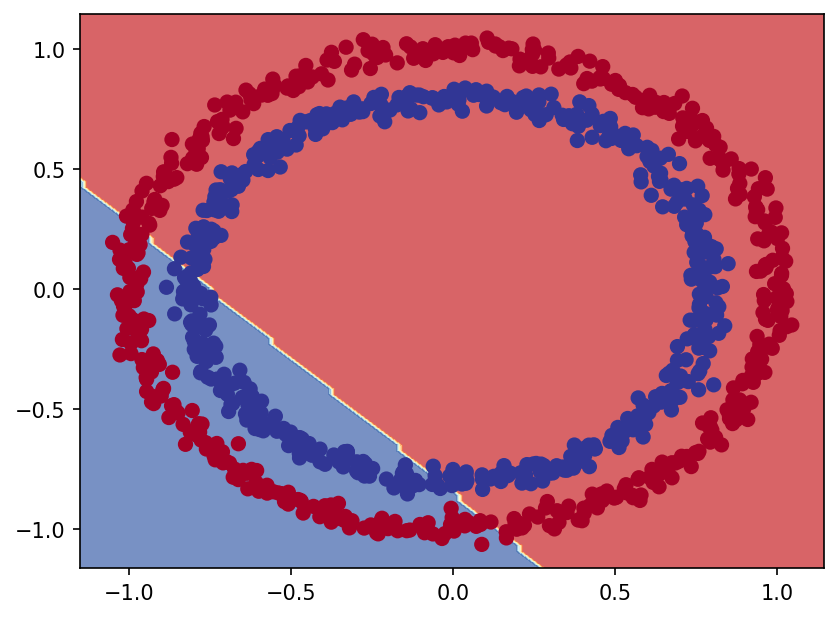

In [18]:
# Making our first model with non-linear activation

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_3.compile(
    optimizer="Adam",
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
)

model_3.fit(X, y, epochs=100, verbose=0)

plot_decision_boundary(model_3, X, y)

313/313 [==============================] - 1s 3ms/step
Doing binary classification


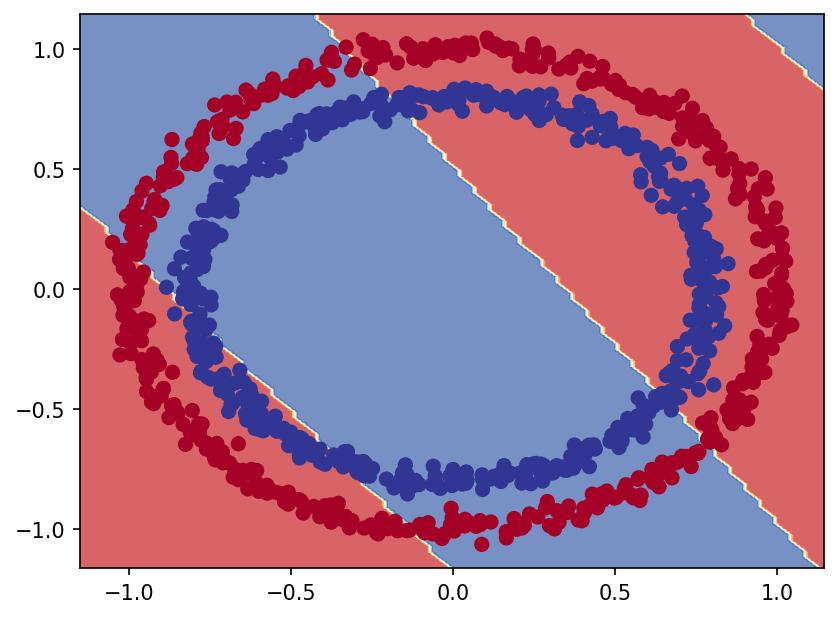

In [26]:
# Multi-layer neural network

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    optimizer="Adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_4.fit(X, y, epochs=250, verbose=0)

plot_decision_boundary(model_4, X, y)

In [27]:
model_4.evaluate(X, y)


32/32 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.5680


[0.6546971201896667, 0.5680000185966492]

313/313 [==============================] - 1s 2ms/step
Doing binary classification


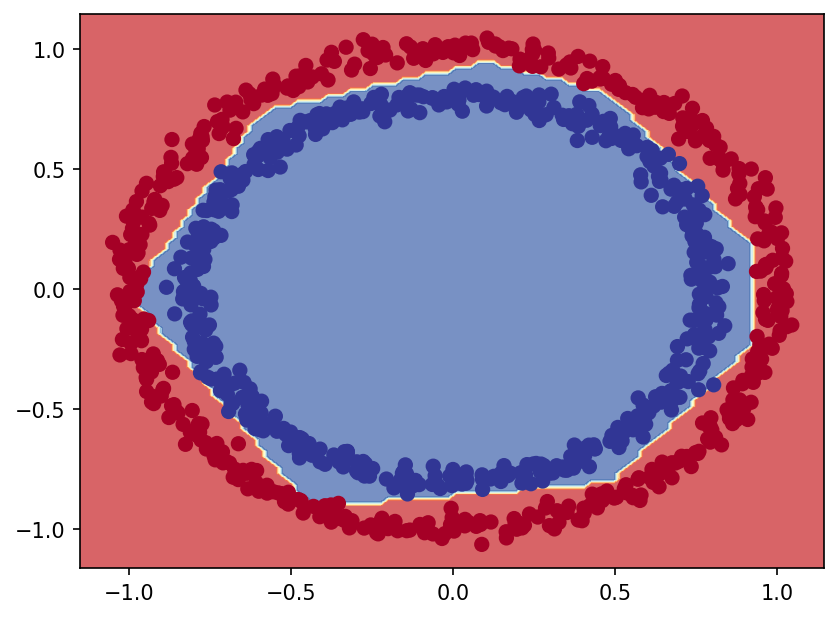

In [30]:
# Maybe this will work. Adding output layer activation

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(
    optimizer="Adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model_5.fit(X, y, epochs=250, verbose=0)

plot_decision_boundary(model_5, X, y)

In [29]:
model_5.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.0257 - accuracy: 0.9990


[0.025652792304754257, 0.9990000128746033]

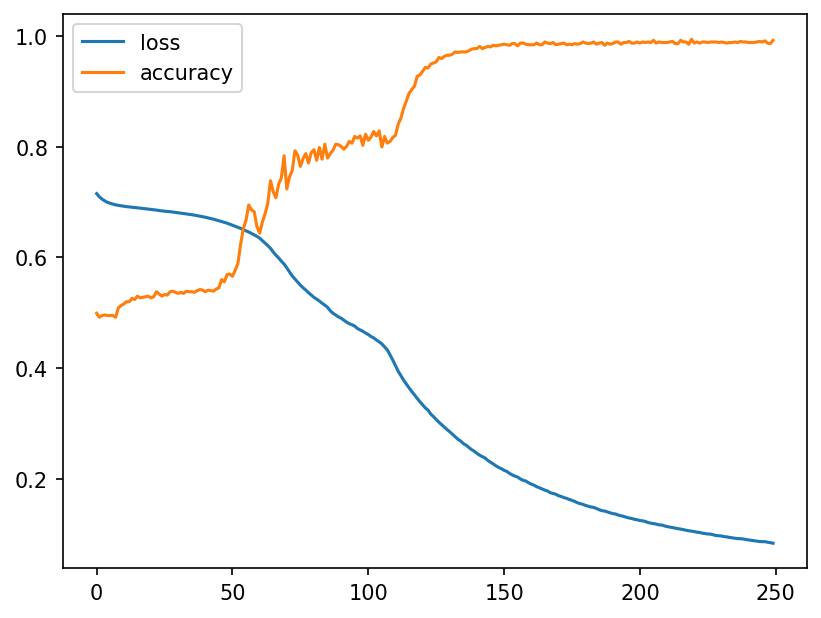

In [32]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.show()

## Visualizing The Activation Functions

In [39]:
# Building a toy tensor
A = tf.cast(tf.range(-10, 10), dtype="float32")
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

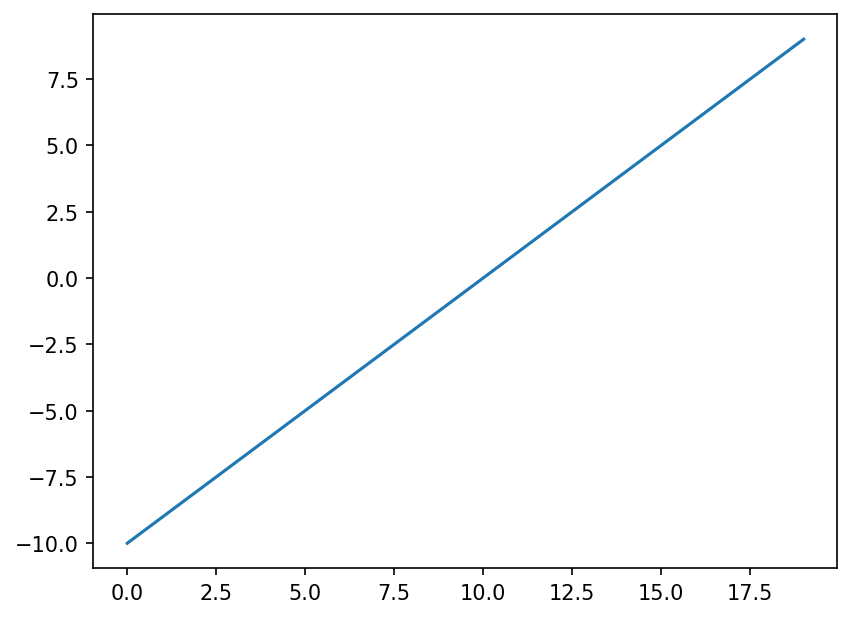

In [40]:
plt.plot(A)

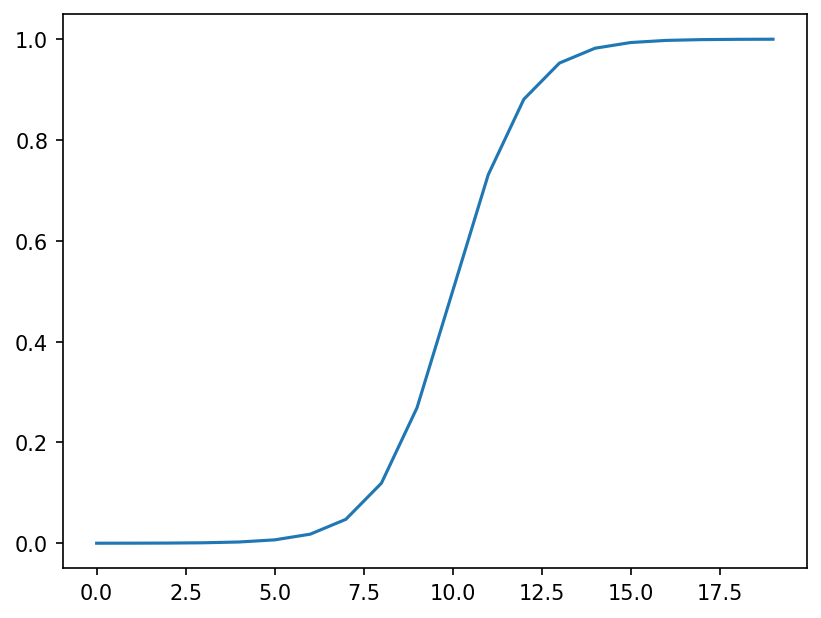

In [42]:
plt.plot(tf.keras.activations.sigmoid(A))

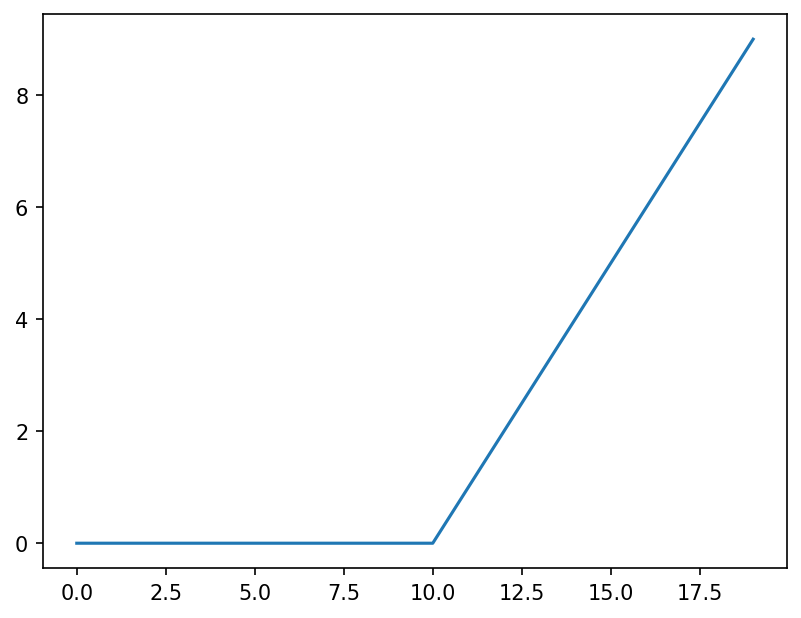

In [45]:
plt.plot(tf.keras.activations.relu(A))

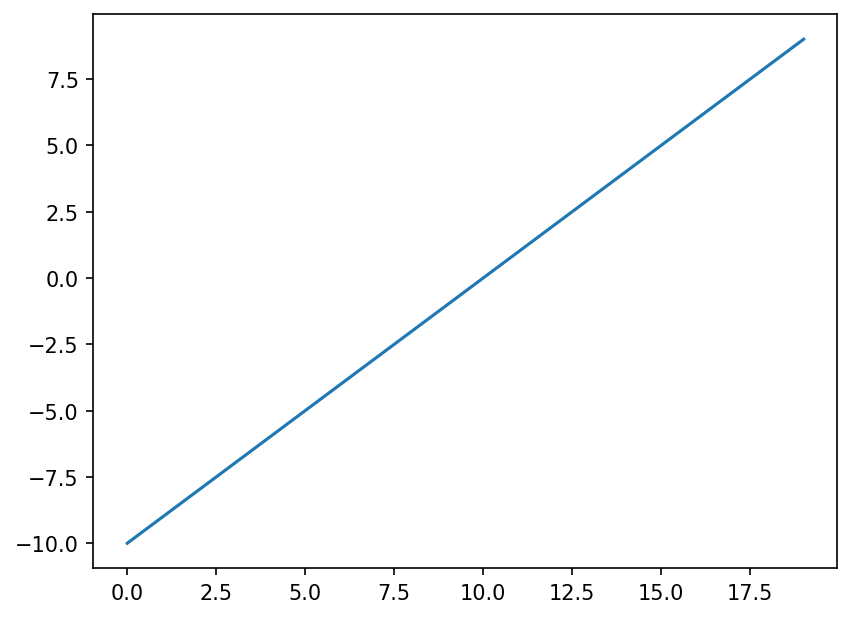

In [46]:
plt.plot(tf.keras.activations.linear(A))

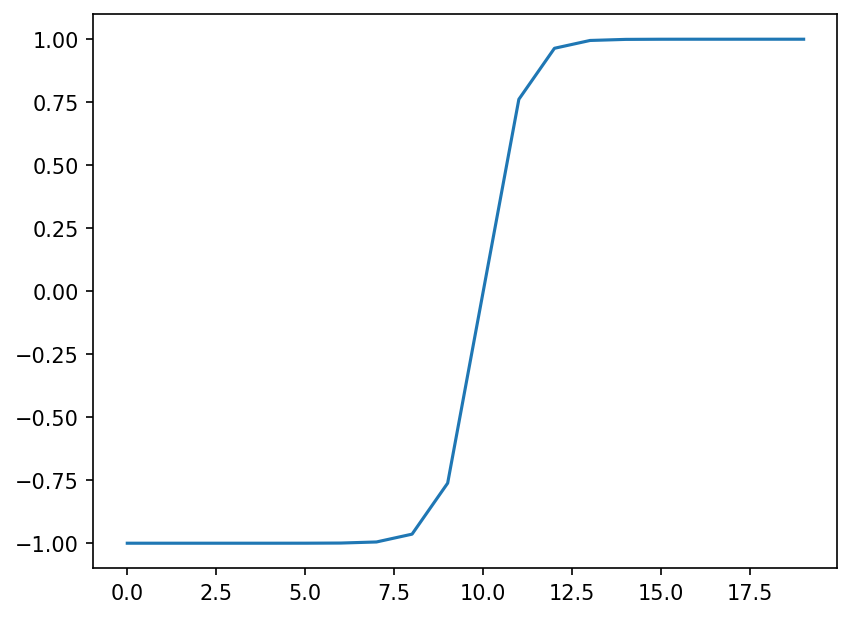

In [47]:
plt.plot(tf.keras.activations.tanh(A))

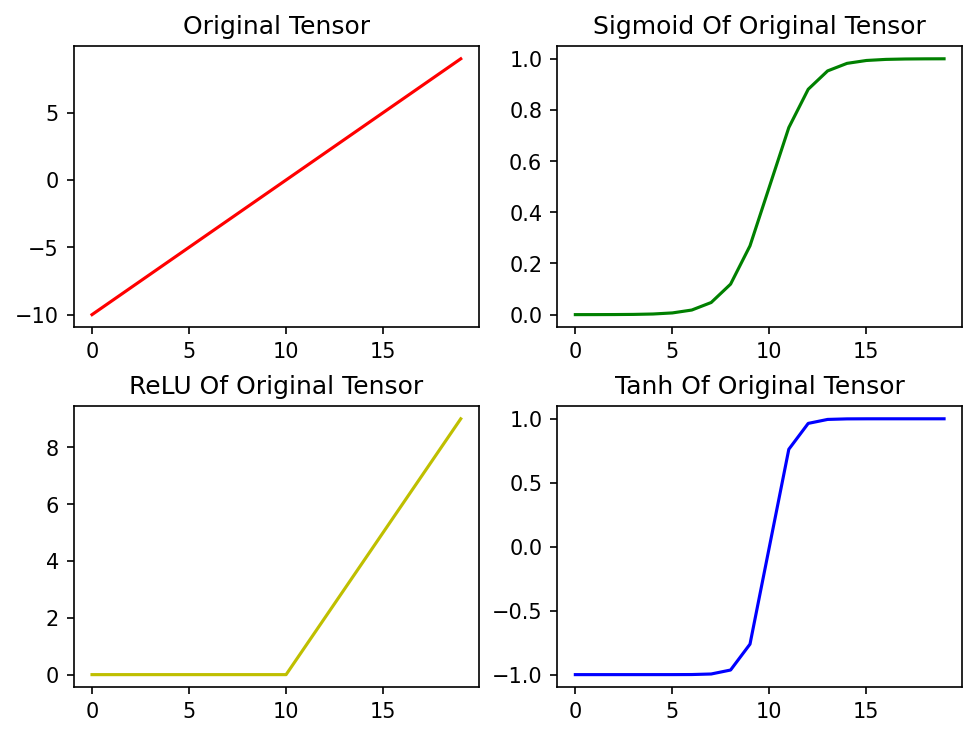

In [53]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)

ax[0, 0].plot(A, c="r")
ax[0, 0].set_title("Original Tensor")

ax[0, 1].plot(tf.keras.activations.sigmoid(A), c="g")
ax[0, 1].set_title("Sigmoid Of Original Tensor")

ax[1, 0].plot(tf.keras.activations.relu(A), c="y")
ax[1, 0].set_title("ReLU Of Original Tensor")

ax[1, 1].plot(tf.keras.activations.tanh(A), c="b")
ax[1, 1].set_title("Tanh Of Original Tensor")

plt.show()


## Evaluating and Improving Our Classification Model

In [54]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((800, 2), (200, 2), (200,), (800,))

In [60]:
# Recreating the model to fit on training data and evaluating on testing data

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_6.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

history = model_6.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5213
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5500
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5688
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.5987
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6350
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.6700
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7075
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.7962
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7538
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.8012
Epoch 11/25
25/25 [

In [61]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9800


[0.15364578366279602, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


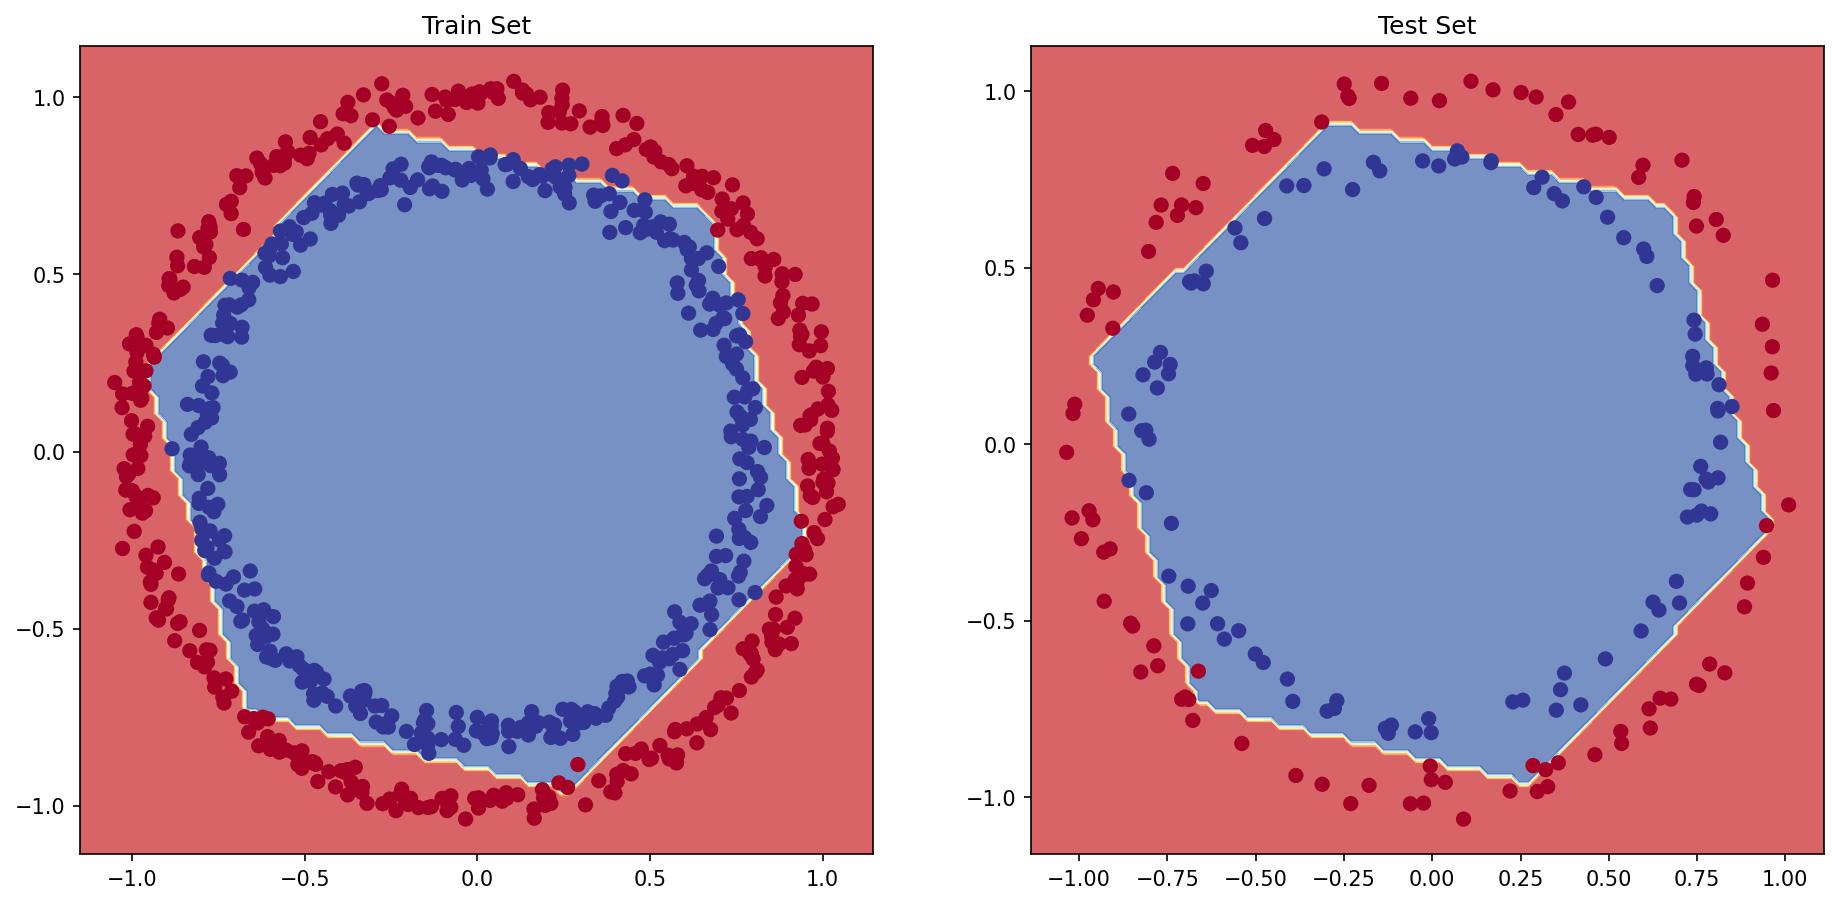

In [65]:
# Plotting decision boundary for training and testing data
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Train Set")
plot_decision_boundary(model_6, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test Set")
plot_decision_boundary(model_6, X_test, y_test)

plt.show()

<AxesSubplot: >

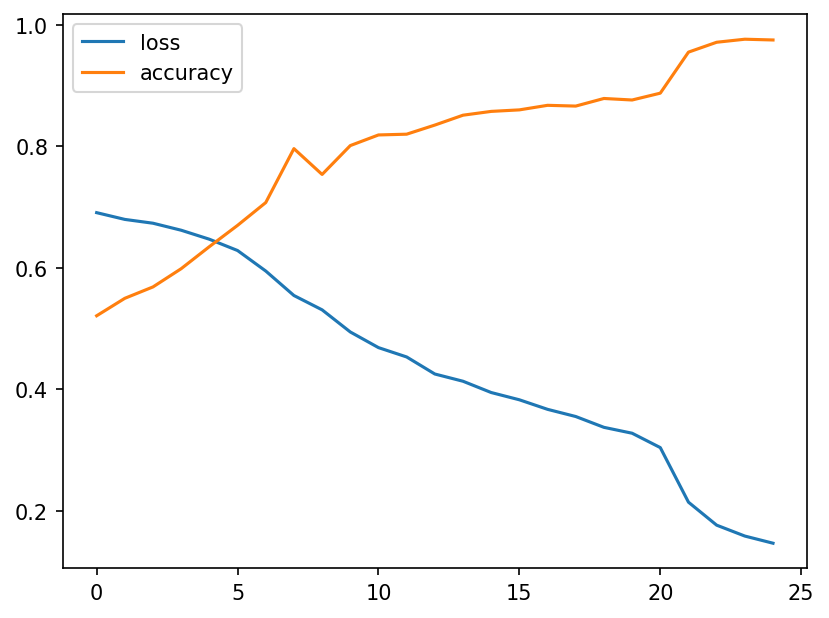

In [66]:
pd.DataFrame(history.history).plot()

## Finding The Best Learning Rate For A Particular Model
To find the best learning rate or the ideal learning rate (this is when the learning rate where the loss decreases the most during training), we are going to use the following steps :-
- A learning rate **callback** - a callback is an extra piece of functionality that is added to the model *while* it is training
- Another model
- A modified loss curves plot

In [70]:
# Making a new model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

# Creating the callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20), verbose=1)

history_7 = model_7.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

model_7.evaluate(X_test, y_test)


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.

Epoch 2: LearningRateScheduler setting learning rate to 0.00011220184543019634.

Epoch 3: LearningRateScheduler setting learning rate to 0.00012589254117941674.

Epoch 4: LearningRateScheduler setting learning rate to 0.00014125375446227543.

Epoch 5: LearningRateScheduler setting learning rate to 0.00015848931924611136.

Epoch 6: LearningRateScheduler setting learning rate to 0.0001778279410038923.

Epoch 7: LearningRateScheduler setting learning rate to 0.00019952623149688796.

Epoch 8: LearningRateScheduler setting learning rate to 0.00022387211385683394.

Epoch 9: LearningRateScheduler setting learning rate to 0.000251188643150958.

Epoch 10: LearningRateScheduler setting learning rate to 0.0002818382931264454.

Epoch 11: LearningRateScheduler setting learning rate to 0.000316227766016838.

Epoch 12: LearningRateScheduler setting learning rate to 0.00035481338923357554.

Epoch 13: LearningRateScheduler setting learni

[0.6932128667831421, 0.5]

<AxesSubplot: xlabel='epochs'>

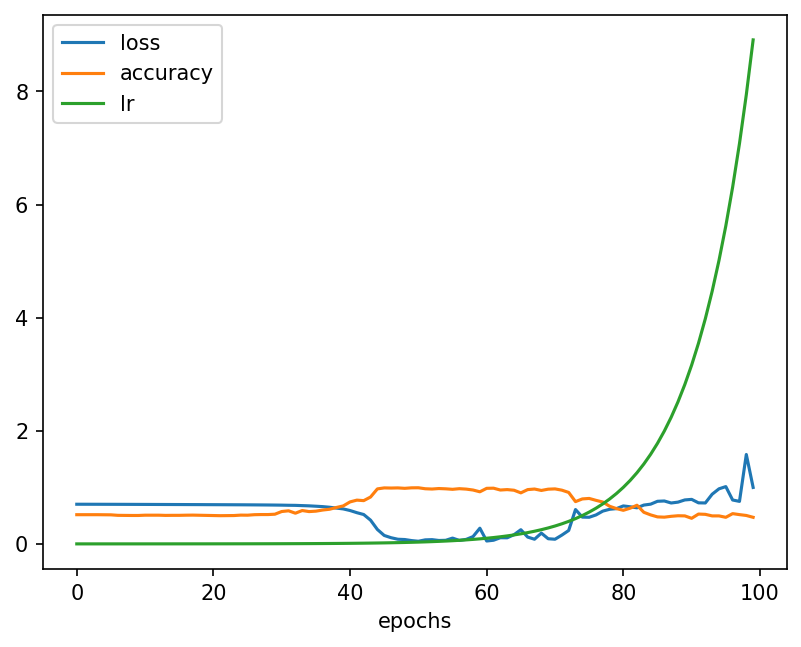

In [75]:
pd.DataFrame(history_7.history).plot(xlabel="epochs")

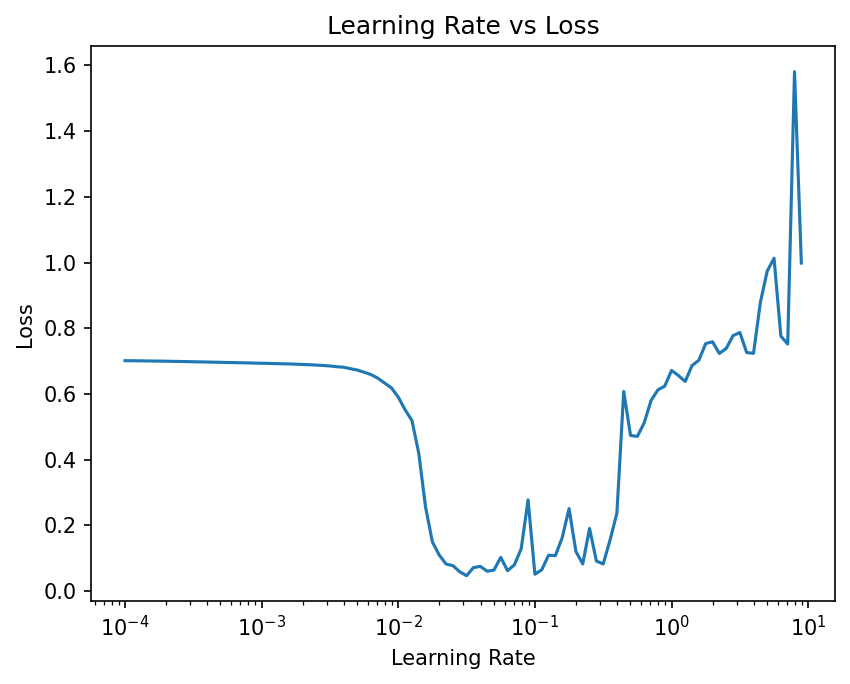

In [81]:
# Plotting the learning rate vs loss
lrs = 1e-4 * 10 ** (tf.range(100)/20)
plt.semilogx(lrs, history_7.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

## Working With Some More Classification Metrics
In Classification, the following metrics are used :-
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix
- Classification Report (from sk-learn)

In [84]:
# Plotting a confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model_6.predict(X_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [85]:
y_test, y_preds

(array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0], dtype=int64),
 array([[0.02599365],
        [0.90019006],
        [0.07488449],
        [0.80331296],
        [0.02346905],
        [0.88235307],
        [0.83601016],
        [0.04290839],
        [0.81825155],
        [0.9581176 ],
        [0.00918827],
        [0.7731364 ],
        [0.9582192 ],
        [0.00804061

Looks like the `y_preds` came out in probability format which is the default format for sigmoid and softmax activation functions. We need to round these to either 0 or 1 to make a confusion matrix

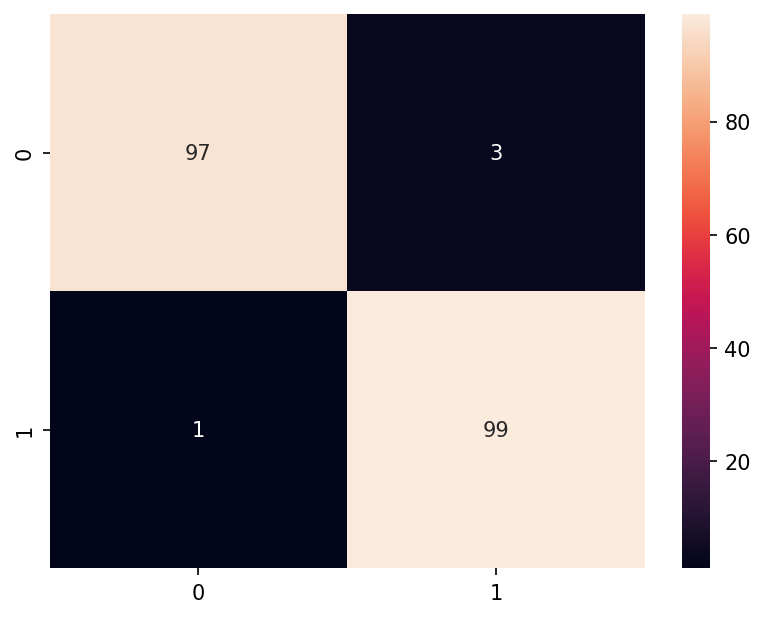

In [90]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, tf.round(y_preds)), annot=True);